In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
import math
def findDistance(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    
    return math.sqrt((x2-x1)**2+(y2-y1)**2)

In [3]:
mp_pose = mp.solutions.pose
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
lm_pose = mp_pose.PoseLandmark

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [12]:
def detectPose(image_pose):
    
    original_image = image_pose.copy()
    
    resultant = pose_image.process(original_image)

    h, w = image_in_RGB.shape[:2]
    lm = resultant.pose_landmarks

    l_shldr_x = int(lm.landmark[lm_pose.LEFT_SHOULDER].x*w)
    l_shldr_y = int(lm.landmark[lm_pose.LEFT_SHOULDER].y*h)

    l_shldr = (l_shldr_x,l_shldr_y)

    r_shldr_x = int(lm.landmark[lm_pose.RIGHT_SHOULDER].x*w)
    r_shldr_y = int(lm.landmark[lm_pose.RIGHT_SHOULDER].y*h)
    r_shldr = (r_shldr_x,r_shldr_y)


    l_hip_x = int(lm.landmark[lm_pose.LEFT_HIP].x*w)
    l_hip_y = int(lm.landmark[lm_pose.LEFT_HIP].y*h)

    l_hip = (l_hip_x,l_hip_y)

    r_hip_x = int(lm.landmark[lm_pose.RIGHT_HIP].x*w)
    r_hip_y = int(lm.landmark[lm_pose.RIGHT_HIP].y*h)
    r_hip = (r_hip_x,r_hip_y)

    print(l_shldr)
    return (l_shldr,r_shldr,l_hip,r_hip)



In [13]:
image_path = 'temp.jpg'
output = cv2.imread(image_path)
image_in_RGB = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
rslt = detectPose(image_in_RGB)

(504, 163)


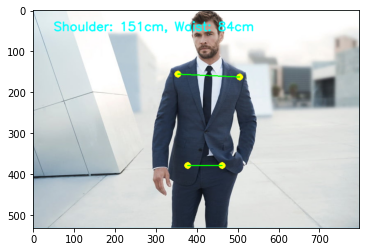

In [26]:
temp = image_in_RGB.copy() 
image = cv2.circle(temp, rslt[0], 5, (255,255,0), 5)
image = cv2.circle(image, rslt[1], 5, (255,255,0), 5)
image = cv2.circle(image, rslt[2], 5, (255,255,0), 5)
image = cv2.circle(image, rslt[3], 5, (255,255,0), 5)

image = cv2.line(image, rslt[0], rslt[1], (0,255,0), 2)
image = cv2.line(image, rslt[2], rslt[3], (0,255,0), 2)

font = cv2.FONT_HERSHEY_SIMPLEX
image = cv2.putText(image, f"Shoulder: {int(findDistance(rslt[0],rslt[1]))}cm, Waist: {int(findDistance(rslt[2],rslt[3]))}cm", (50,50), font, 
                   1, (0,255,255), 2, cv2.LINE_AA)
plt.imshow(image)

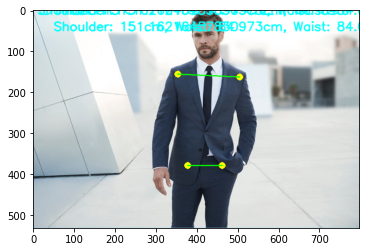

In [16]:
findDistance(rslt[2],rslt[3])

84.0

In [15]:
findDistance(rslt[0],rslt[1])

151.16216457830973